# **Taller 1 MIS**


##### Juan Felipe Agudelo, Santiago Caraballo, Rafael Santofimio, Juan Diego Valencia 

In [157]:
#Importar los paquetes
import numpy as np
import pandas as pd
import networkx as nx
import graph_tools
import matplotlib.pyplot as plt
import itertools as it
from numpy.random import RandomState
import time

### Punto 1

1. Calcule todas las posibles redes de tamaño 5 y guárdelas en un listado. Asegúrese de guardar únicamente las redes que no son isomorfas entre si, i.e. guarde únicamente un representante de cada conjunto de redes isomorfas entre si

In [158]:

# Función que permite crear las matrices de adyacencia a partir de listados de 0 y 1. 
def matrix_creator(lista,n):
    m = len(lista)
    if 2*m == (n*(n-1)):
        contador = 1
        A = []
        AA = [0 for i in range(n)]
        while contador < n+1:
            limite = n - contador
            B = lista[:limite]
            lista = lista[limite:]
            C = AA[:contador] + B
            A.append(C)
            contador+=1
        A = np.array(A)
        return A + np.transpose(A)
    else:
        print("Introduzca los inputs correctos")

In [159]:
#Funcion que genera una red de longitud n

def network_creator(n):
    A = [0]*n
    B = [1]*n
    guardar = set()
    contador = 1
    while contador<n:
        C = B[:contador]+A[contador:]
        guardar = guardar.union(set(it.permutations(C,n)))
        contador+=1
    guardar = [list(i) for i in guardar]
    guardar = [A] + guardar + [B]
    return(guardar)



In [160]:
n = 5
longitud = int(((n-1)*n)/2)
M_Adyacencia = [matrix_creator(i,n) for i in network_creator(longitud)]
Grafos = [nx.from_numpy_array(i) for i in M_Adyacencia]

In [161]:
Revisor = {i:True for i in range(len(Grafos))}
for i in Revisor:
    for j in Revisor:
        if j>i and Revisor[i] and Revisor[j] :
            if nx.is_isomorphic(Grafos[i],Grafos[j]):
                Revisor[j] = False

Grafos_Def = [Grafos[i] for i in Revisor if Revisor[i]]
M_Adyacencia_Def = [M_Adyacencia[i] for i in Revisor if Revisor[i]]


## Punto 2

Calcule la utilidad de cada nodo para cada una de las redes que creó y guarde esto como
un atributo de las redes. Utilice la función de utilidad dada por $U_i(g)=deg(i)^{1/2}$

In [162]:

# Función de utilidad que nos permite generar las utilidades relevantes
def utility_function(grafo):
    utility0 = dict(grafo.degree())
    utility = {i:(utility0[i])**0.5 for i in utility0}
    return utility
# Esta funcion crea un diccionario con llaves = nodos i y valores = U_i(grafo)

In [163]:
#Se crea objeto con las utilidades de cada nodo
Utilidades = [utility_function(i) for i in Grafos_Def]
for i in range(len(Grafos_Def)):
    nx.set_node_attributes(Grafos_Def[i], Utilidades[i], "Utility")

## Punto 3

Calcule los grafos socialmente eficientes (SE). Reporte cada uno de estos (i.e. pegue un
gráfico de cada uno en el archivo .pdf y grafíquelos en el script que entregue)

______________________________


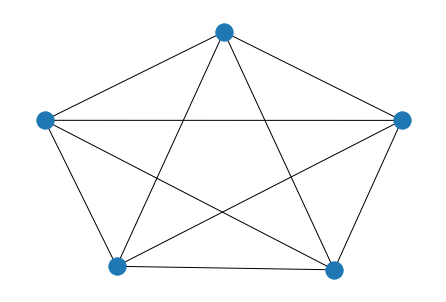

In [164]:
#Se define la lista de utilidades totales de todos los grafos. La utilidad total de cada grafo se define 
#  como la suma de las utilidades de cada nodo
Social_Utility = [sum(list(nx.get_node_attributes(Grafos_Def[i],"Utility").values())) for i in range(len(Grafos_Def))]
#Se obtiene el valor maximo entre todas las utilidades
Max_Social_Utility = max(Social_Utility)
#Se crea la lista con los grafos cuya utilidad social es el maximo
Grafos_SE = [Grafos_Def[i] for i in range(len(Social_Utility)) if Social_Utility[i] == Max_Social_Utility]

for i in Grafos_SE:
    print("_"*30)
    nx.draw(i)

## Punto 4

Calcule los grafos Pareto-eficientes (PE). Reporte cada uno de estos

33
______________________________


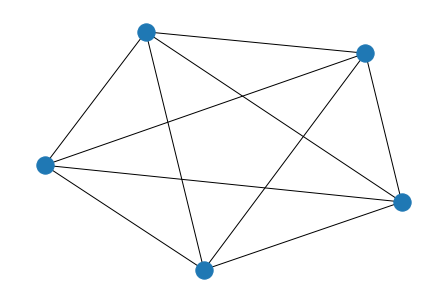

In [188]:
#Se define una lista con las utilidades de cada grafo
utilities_i=[list(nx.get_node_attributes(Grafos_Def[i],"Utility").values()) for i in range(len(Grafos_Def))]
Grafos_PE=[]
#Se itera sobre todos los grafos posibles extrayendo una lista que calcula para cada grafo k,  el 
#numero de nodos que son mayores o iguales en el grafo j. Si el numero maximo de nodos mayores iguales a la red j es
#menor a 5 significa que no existe otra red que pueda mejorar la utilidad de al menos un nodo y mantener la de los demas constante
for k in range(0,len(Grafos_Def)):
    a=([sum(np.greater_equal(utilities_i[j], utilities_i[k])) 
    for j in range(0,len(Grafos_Def)) if j!=k and sum(np.equal(utilities_i[j], utilities_i[k]))!=5])
    if max(a)<5:
        print(k)
        Grafos_PE=Grafos_PE+[Grafos_Def[k]]
    
for i in Grafos_SE:
    print("_"*30)
    nx.draw(i)